# API Homework


### Takes user input for a stock (using the Ticker Symbol): IE with the input() command

In [81]:
# Import necessary libraries
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Get the stock ticker symbols
stock_input = input("Enter a list of stock ticker symbols separated by commas: ").upper()
stock_list = [stock.strip() for stock in stock_input.split(',')]
print("The stocks to research will be: " + ", ".join(stock_list))

# Define API key and URL for retrieving stock data and the trending stock data
apikey = "api"
base_url = "url"
trending_url = "url"

Enter a list of stock ticker symbols separated by commas: AAPL
The stocks to research will be: AAPL


### Display back the user: Ticker Name, Full Name of the Stock, Current Market Price, Target Mean Price, 52 week high and 52 week low. Also, output 5 of the current trending stock.

In [82]:
# Initialize headers and an empty list to store stock data
headers = {
    'x-api-key': apikey
    }
all_stock_data = []

# Iterate through the list of stocks and get data for each one
for stock_symbol in stock_list:
    query_params = {"symbols": stock_symbol}
    response = requests.get(base_url, headers=headers, params=query_params)

    # Check if data is available for stock information
    if response.status_code == 200:
        stock_data = response.json()

        # Check if the expected information is present
        if 'quoteResponse' in stock_data and 'result' in stock_data['quoteResponse'] and stock_data['quoteResponse']['result']:
            stock_info = stock_data['quoteResponse']['result'][0]

            # Extract relevant information with N/A to handle missing data for the dataframe
            ticker_name = stock_info.get('symbol', 'N/A')
            full_name = stock_info.get('longName', 'N/A')
            current_market_price = stock_info.get('regularMarketPrice', 'N/A')
            target_mean_price = stock_info.get('fiftyDayAverage', 'N/A')
            week_high = stock_info.get('fiftyTwoWeekHigh', 'N/A')
            week_low = stock_info.get('fiftyTwoWeekLow', 'N/A')

            # Print out the stock information
            print(f"\nInformation for {ticker_name}:")
            print(f"Ticker Name: {ticker_name}")
            print(f"Full Name: {full_name}")
            print(f"Current Market Price: ${current_market_price}")
            print(f"Target Mean Price: ${target_mean_price}")
            print(f"52 Week High: ${week_high}")
            print(f"52 Week Low: ${week_low}")

            # Append the stock information to the all_stock_data list for the dataframe
            all_stock_data.append({
                "Category": "User Stock",
                "Ticker Name": stock_info.get('symbol', 'N/A'),
                "Full Name": stock_info.get('longName', 'N/A'),
                "Current Market Price": stock_info.get('regularMarketPrice', 'N/A'),
                "Target Mean Price": stock_info.get('fiftyDayAverage', 'N/A'),
                "52 Week High": stock_info.get('fiftyTwoWeekHigh', 'N/A'),
                "52 Week Low": stock_info.get('fiftyTwoWeekLow', 'N/A'),
                "Trending Stocks": None
            })
        else:
            print(f"Error: Stock data for {stock_symbol} not found. Please check the ticker symbol and try again.")
    else:
        print(f"Error: Unable to retrieve data for {stock_symbol}.")


trending_response = requests.get(trending_url, headers=headers)

# Check if data for trending stocks is available
if trending_response.status_code == 200:
    trending_data = trending_response.json()

    # Extract trending stock symbols
    if 'finance' in trending_data and 'result' in trending_data['finance'] and trending_data['finance']['result']:
        trending_stocks = trending_data['finance']['result'][0]['quotes']

        # Print the top 5 trending stocks
        print("\nTop 5 Trending Stocks:")
        for i, stock in enumerate(trending_stocks[:5], 1):
            print(f"{i}. Ticker: {stock.get('symbol', 'N/A')}")

            # Append trending stocks for the dataframe and put empty calues when necessary for the dataframe
            all_stock_data.append({
                "Category": "Trending Stock",
                "Ticker Name": None,
                "Full Name": None,
                "Current Market Price": None,
                "Target Mean Price": None,
                "52 Week High": None,
                "52 Week Low": None,
                "Trending Stocks": stock.get('symbol', 'N/A')
            })
    else:
        print("Error: Trending stocks data not found.")
else:
    print(f"Error: Unable to retrieve trending stocks.")


Information for AAPL:
Ticker Name: AAPL
Full Name: Apple Inc.
Current Market Price: $227.725
Target Mean Price: $222.0918
52 Week High: $237.23
52 Week Low: $164.08

Top 5 Trending Stocks:
1. Ticker: ^N225
2. Ticker: NQ=F
3. Ticker: 9866.HK
4. Ticker: 9988.HK
5. Ticker: ^HSI


 ### 3.	Put that data in a DataFrame and then store that to a CSV file

In [83]:
# DataFrame with the combined stock data
combined_stock_df = pd.DataFrame(all_stock_data)

# Save DataFrame to a CSV file
combined_stock_df.to_csv("combined_stock_data.csv", index=False)
print("\nAll of the stock data and the top 5 trending stocks have been saved to 'combined_stock_data.csv' successfully.")

# Print out the combined DataFrame
print("\nCombined DataFrame:")
print(combined_stock_df)


All stock data and the top 5 trending stocks have been saved to 'combined_stock_data.csv' successfully.

Combined DataFrame:
         Category Ticker Name   Full Name  Current Market Price  \
0      User Stock        AAPL  Apple Inc.               227.725   
1  Trending Stock        None        None                   NaN   
2  Trending Stock        None        None                   NaN   
3  Trending Stock        None        None                   NaN   
4  Trending Stock        None        None                   NaN   
5  Trending Stock        None        None                   NaN   

   Target Mean Price  52 Week High  52 Week Low Trending Stocks  
0           222.0918        237.23       164.08            None  
1                NaN           NaN          NaN           ^N225  
2                NaN           NaN          NaN            NQ=F  
3                NaN           NaN          NaN         9866.HK  
4                NaN           NaN          NaN         9988.HK  
5       

### Use MatPlotLib to chart the historical price of a stock price’s highest value over the past 5 days.

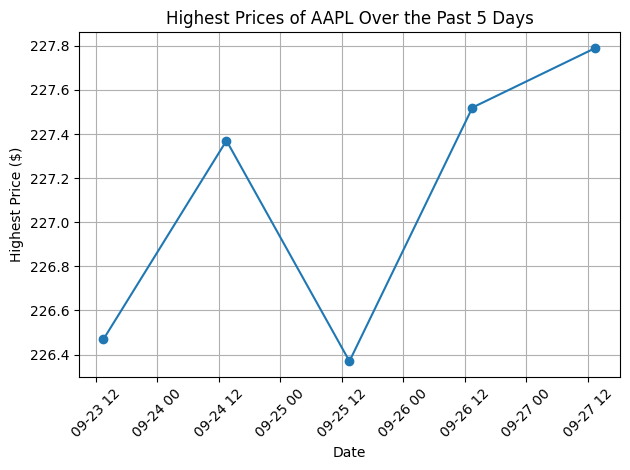

In [84]:
# Define your API key and the base URL for the historical data endpoint
apikey = "api"
base_url = "url"

# Define the stock symbol and the parameters for the historical data
params = {
    "symbols": stock_input,
    "range": "5d",
    "interval": "1d"
}

# Set up the request headers with the API key
headers = {
    'x-api-key': apikey
    }

# Make the API call to get historical data
response = requests.get(base_url, headers=headers, params=params)

# Check if the connnection to historical data is correct
if response.status_code == 200:
    historical_data = response.json()

    # Check if the symbol inputted exists
    if stock_input in historical_data:

        # Extract timestamp and high prices from the response for the symbol
        timestamps = historical_data[stock_input]['timestamp']
        high_prices = historical_data[stock_input]['close']

        # Convert timestamps to dates
        dates = pd.to_datetime(timestamps, unit='s')

        # Plot the high price values over the past 5 days
        plt.plot(dates, high_prices, marker='o')
        plt.title(f'Highest Prices of {stock_input} Over the Past 5 Days')
        plt.xlabel('Date')
        plt.ylabel('Highest Price ($)')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Error: No data found for symbol '{stock_input}'.")
else:
    print(f"Error: Unable to retrieve historical data.")